In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
## Read the dataset
df=pd.read_csv('height-weight.csv')
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


Text(0, 0.5, 'Height')

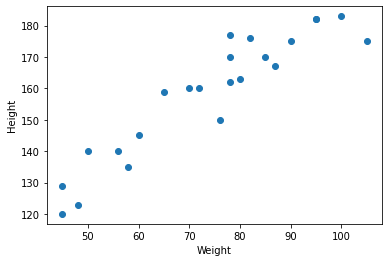

In [3]:
## Visualizing data using scatter plot
plt.scatter(df['Weight'],df['Height'])
plt.xlabel('Weight')
plt.ylabel('Height')

In [4]:
## Divide the dataset into independent and dependent features
X=df[['Weight']]  ## Independent feature. Stored as 2d for standardization calculation purpose
Y=df['Height']  ## Dependent feature

In [5]:
## Split data into train test set
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.20,random_state=42)

In [6]:
X.shape,Y.shape

((23, 1), (23,))

In [7]:
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((18, 1), (5, 1), (18,), (5,))

In [8]:
## Standardize the data(only train independent feature)
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()   ## we need to standardize the test data based on the observation we get from the train data
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

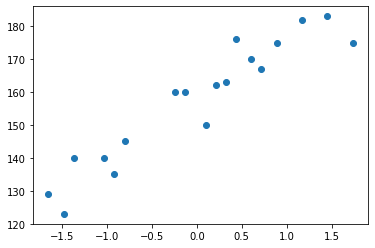

In [9]:
plt.scatter(X_train,Y_train)

In [10]:
## Train the Simple Linear Regression model
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,Y_train)

LinearRegression()

In [11]:
print("The slope or coefficeint of the weight is :",regressor.coef_)  
print("The intercept is :",regressor.intercept_)

The slope or coefficeint of the weight is : [17.03440872]
The intercept is : 157.5


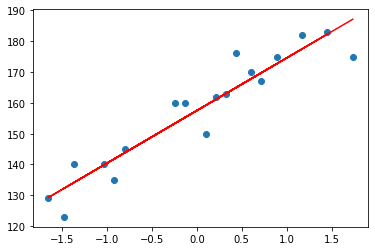

In [12]:
## To get Best Fit line
plt.scatter(X_train,Y_train)
plt.plot(X_train,regressor.predict(X_train),'r')

### Prediction of train data
1. predicted height output= intercept +coef_(Weights)
2. y_pred_train =157.5 + 17.03(X_train)
          
### Prediction of test data
1. predicted height output= intercept +coef_(Weights)
2. y_pred_test =157.5 + 17.03(X_test)

In [13]:
## Prediction of Y test:
Y_pred_test=regressor.predict(X_test)

In [14]:
Y_pred_test,Y_test

(array([161.08467086, 161.08467086, 129.3041561 , 177.45645118,
        148.56507414]), 15    177
 9     170
 0     120
 8     182
 17    159
 Name: Height, dtype: int64)

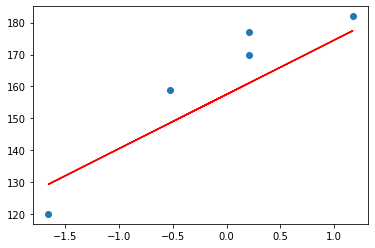

In [15]:
plt.scatter(X_test,Y_test)
plt.plot(X_test,regressor.predict(X_test),'r')

## Performance Metrics
- Squared and Adjusted R Squared

## Cost Functions
- MSE,MAE,RMSE


In [16]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
mse=mean_squared_error(Y_test,Y_pred_test)
mae=mean_absolute_error(Y_test,Y_pred_test)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse) ##Less the value more the performance will be

109.77592599051664
9.822657814519232
10.477400726827081


In [17]:
## R squared score
from sklearn.metrics import r2_score
score=r2_score(Y_test,Y_pred_test)
score    ## R squared score will always be greater than the Adjusted R Squared score

0.776986986042344

In [18]:
## Adjusted R Squared score
score1=1-(1-score)*(len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1)
score1

0.7026493147231252

In [19]:
## New datapoint weight is 80
scaled_weight=scaler.transform([[80]])
scaled_weight

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[0.32350772]])

In [20]:
print("The height prediction for weight 80kgs is :",regressor.predict([scaled_weight[0]]))

The height prediction for weight 80kgs is : [163.01076266]


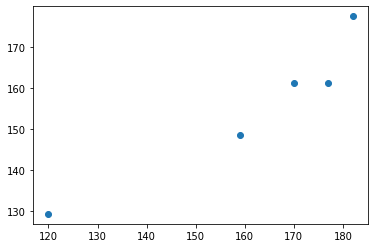

In [21]:
## Assumptions:
## 1. Distribution should be linear.
plt.scatter(Y_test,Y_pred_test)

In [22]:
## 2. Residuals-Residuals distribution should be normal
residuals=Y_test-Y_pred_test ## Difference between Y_test and Y_pred_test
residuals

15    15.915329
9      8.915329
0     -9.304156
8      4.543549
17    10.434926
Name: Height, dtype: float64

<ipython-input-23-0611c985992a>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals,kde=True)


<Axes: xlabel='Height', ylabel='Density'>

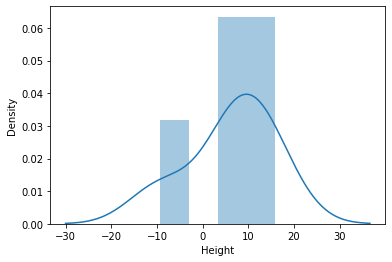

In [23]:
## plot the residuals
sns.distplot(residuals,kde=True)

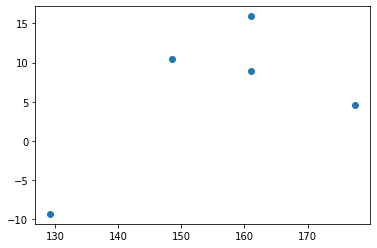

In [24]:
## scatter plot with respect to prediction and residuals
## 3. uniform distribution with respect to prediction and residuals
plt.scatter(Y_pred_test,residuals)